In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['calendar.csv', 'listings.csv', 'reviews.csv']


In [67]:
#reading the dataset
listings_dataset = pd.read_csv('../input/listings.csv')
listings_dataset = pd.DataFrame(listings_dataset)

#find number of listings and number of hosts
listings_count = listings_dataset['id'].count()
hosts = len(listings_dataset['host_id'].unique())

print('this dataset has %d listings by %d hosts.' % (listings_count, hosts))
                                                                                         

this dataset has 3818 listings by 2751 hosts.


In [3]:
listings_dataset.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [4]:

columns_loc = ['id', 'neighbourhood', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type', 'price']

listings_dataset_loc = listings_dataset[columns_loc]
listings_dataset_loc.head()

,id,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,price
0,241032,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$85.00
1,953595,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$150.00
2,3308979,Queen Anne,West Queen Anne,98119,House,Entire home/apt,$975.00
3,7421966,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$100.00
4,278830,Queen Anne,West Queen Anne,98119,House,Entire home/apt,$450.00


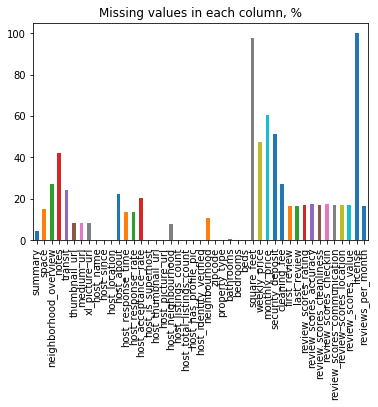

In [5]:
# missing values for each column
listings_na = listings_dataset.isnull().mean()*100

#columns having missing values
listings_col_na = listings_na[listings_na > 0]


listings_col_na.plot.bar(title='Missing values in each column, %')

In [6]:
#read the dataset
calender_dataset = pd.read_csv('../input/calendar.csv')
calender_dataset = pd.DataFrame(calender_dataset)
calender_dataset.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


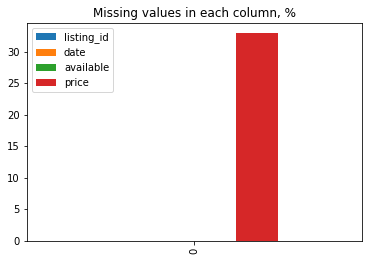

In [7]:
#get percentage of missing values for each column in dataset
calendar_na = pd.DataFrame([calender_dataset.isnull().mean()*100])

#plot the results
calendar_na.plot.bar(title='Missing values in each column, %')

In [33]:
#Helper functions for dataset cleaning

def monthh(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

def yearr(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])

def hostt(row):
    ''' Get year from a date represented as a string '''
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def col_split(Clean_DataFrame, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in Clean_DataFrame[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
	 # split into columns
    for value in values_sorted[: max_dummies_num]:
        Clean_DataFrame[column_name + '_' + value[0]] = Clean_DataFrame.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

def fee_if_extra_guest(row):
    ''' Return 1 when the is fee for exatra people '''
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0

In [ ]:
#Main dataset cleaning function
def cleaning_data(listings_dataset, calender_dataset):
    '''
    INPUT
    listings_Clean_DataFrame - pandas dataframe containing listings data 
    calendar_Clean_DataFrame - pandas dataframe containing calendar data
    
   ** OUTPUT
    Clean_DataFrame - cleaned dataset, which contains merged tables:
    1. irrelevant columns are dropped;
    2. string containing dates are converted into numbers;
    3. columns, containing lists, are split into several columns (for example, amenities)
    4. missing values are imputed with mean or mode.**
    '''

In [ ]:
#merge datasets
listings_dataset = listings_dataset.rename(index=str, columns={"id": "listing_id"})
Clean_DataFrame = pd.merge(calender_dataset, listings_dataset, on = 'listing_id')
    
    #drop the irrelevant columns
Drop_col = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
Clean_DataFrame = Clean_DataFrame.drop(columns = Drop_col)

In [ ]:
#convert date from the calendar into month and drop the date colum
Clean_DataFrame['month'] = Clean_DataFrame.apply(lambda row: monthh(row),axis=1)
Clean_DataFrame['year'] = Clean_DataFrame.apply(lambda row: yearr(row),axis=1)
Clean_DataFrame = Clean_DataFrame.drop(columns = ['date'])

In [ ]:
#remove rows where price_x == nan, because price will be used as response column
Clean_DataFrame = Clean_DataFrame.dropna(subset=['price_x'])


In [ ]:
#convert price to number and drop the price_x column
Clean_DataFrame['price'] = Clean_DataFrame['price_x'].astype(str)
Clean_DataFrame['price'] = Clean_DataFrame['price'].str.replace("[$, ]", "").astype("float")
Clean_DataFrame = Clean_DataFrame.drop(columns = ['price_x'])

In [ ]:
 #convert host_since date into number and fill in missing values, drop the original column
Clean_DataFrame['host_since_year'] = Clean_DataFrame.apply(lambda row: hostt(row),axis=1)
Clean_DataFrame['host_since_year'].fillna(Clean_DataFrame['host_since_year'].mean(), inplace = True)
#Clean_DataFrame = Clean_DataFrame.drop(columns = ['host_since'])

#convert host_response_rate into number and fill in missing values, drop the original column
#Clean_DataFrame['host_response_rate_num'] = Clean_DataFrame['host_response_rate'].astype(str)
#Clean_DataFrame['host_response_rate_num'] = Clean_DataFrame['host_response_rate_num'].str.replace("%", "").astype("float")
#Clean_DataFrame['host_response_rate_num'].fillna(Clean_DataFrame['host_response_rate_num'].mean(), inplace = True)

#Clean_DataFrame['host_response_rate_buckets'] = pd.qcut(Clean_DataFrame['host_response_rate_num'], 5, labels=False, duplicates = 'drop')

#Clean_DataFrame = Clean_DataFrame.drop(columns = ['host_response_rate', 'host_response_rate_num'])

#fill missing values with mean value for host_listings_count
Clean_DataFrame['host_listings_count'].fillna(Clean_DataFrame['host_listings_count'].mean(), inplace = True)

#split host_verifications into dummy columns and drop the original column
col_split(Clean_DataFrame, 'host_verifications')
Clean_DataFrame = Clean_DataFrame.drop(columns = ['host_verifications'])

#fill in missing values for bathrooms, bedrooms and beds with mode
Clean_DataFrame['bathrooms'] = Clean_DataFrame['bathrooms'].fillna(Clean_DataFrame['bathrooms'].mode()[0])
Clean_DataFrame['bedrooms'] = Clean_DataFrame['bedrooms'].fillna(Clean_DataFrame['bedrooms'].mode()[0])
Clean_DataFrame['beds'] = Clean_DataFrame['beds'].fillna(Clean_DataFrame['beds'].mode()[0])


In [ ]:
#split amenities into dummy columns and drop the original column
col_split(Clean_DataFrame, 'amenities')
Clean_DataFrame = Clean_DataFrame.drop(columns = ['amenities'])
    
    #turn extra people fee into binary column (1 - if fee for extra people is charged, 0 - otherwise)
Clean_DataFrame['extra_people_fee'] = Clean_DataFrame.apply(lambda row: fee_if_extra_guest(row),axis=1)
Clean_DataFrame = Clean_DataFrame.drop(columns = ['extra_people'])
    
    #fill missing values for review scores columns
review_scores_col = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
for column in review_scores_col:
    Clean_DataFrame[column].fillna(Clean_DataFrame[column].mean(), inplace = True)
    
return Clean_DataFrame

In [ ]:
# apply functions above to clean dataset
Clean_DataFrame = cleaning_data(listings_dataset, calender_dataset)

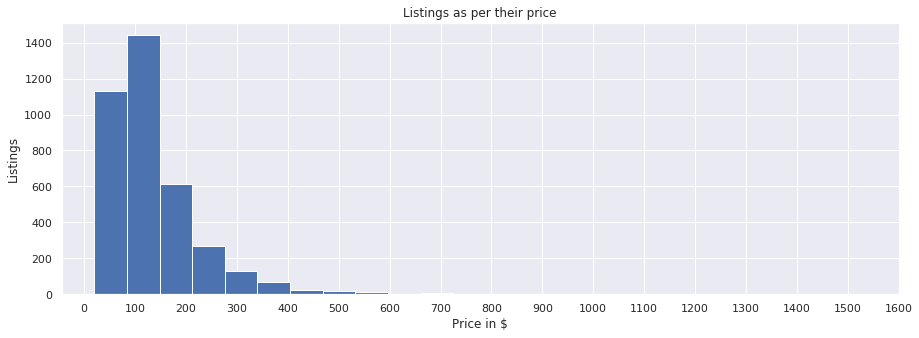

In [54]:
#First find the average price of istings and then plot
Average_Price_Listings = Clean_DataFrame.groupby('listing_id').mean()['price']

plt.figure(figsize=(15,5))
plt.hist(Average_Price_Listings, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Listings')
plt.xlabel('Price in $')
plt.title('Listings as per their price')


plt.savefig('Price distrubution.png')

plt.show()

In [55]:
#minimum, maximum and average prices exploration
minimum_price = Clean_DataFrame['price'].min()
maximum_price = Clean_DataFrame['price'].max()
average_price = Clean_DataFrame['price'].mean()

print('Minimum price  %d$.' % (minimum_price))
print('Maximum price  %d$' % (maximum_price))
print('Average price  %d$.' % (average_price))

Minimum price  10$.
Maximum price  1650$
Average price  137$.


## Question 1: What are the monthy changes occuring in price influence by the neighborhood? 

Answer: For this we first get the list of all neighborhood and then see the monthy change in price...

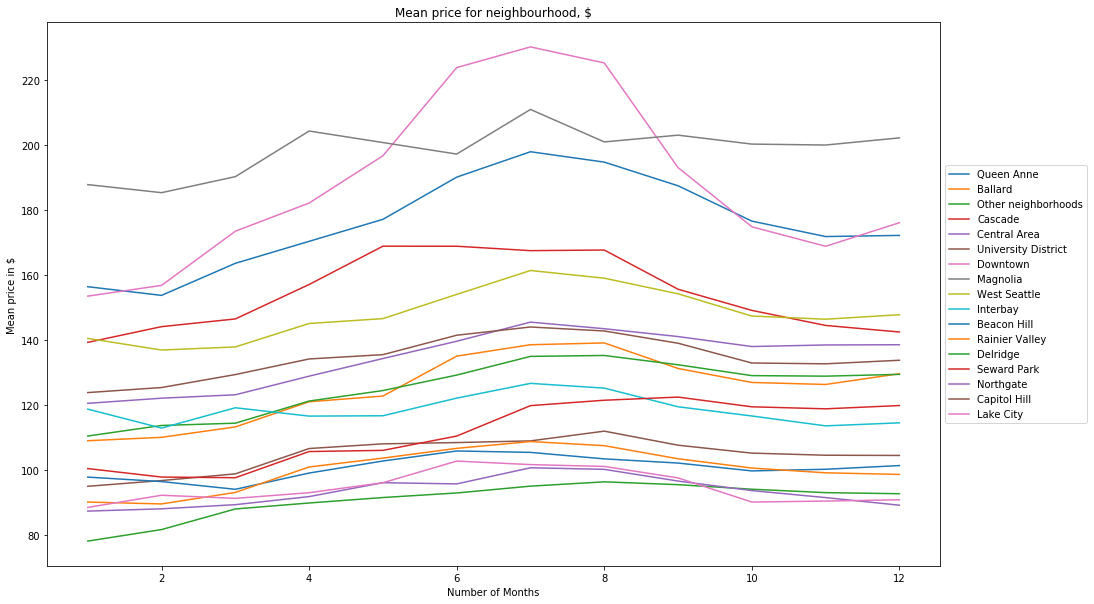

In [51]:
#Now find monthy changes in price for neighborhood 
monthly_change_in_price = Clean_DataFrame.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

# list of  all neighbourhoods
neighbourhood_list = Clean_DataFrame['neighbourhood_group_cleansed'].unique()

for neighbourhood in neighbourhood_list:
    ax.plot(monthly_change_in_price[monthly_change_in_price['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             monthly_change_in_price[monthly_change_in_price['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Mean price in $')
plt.xlabel('Number of Months')
plt.title('Mean price for neighbourhood, $')

plt.savefig('mean price for neighbourhood')

plt.show()

Here, the above graph shows that neighbourhood  have great influence on the listing price as the prices are different in every neighborhood .. 

## Question 2 : What are the features that affect the prices ?

Answer: For this we take out some coumns that are numeric incuding 'price'  from the Clean_DataFrame and then find the correation between them. I use Heatmap graph for visualizing the correlation.

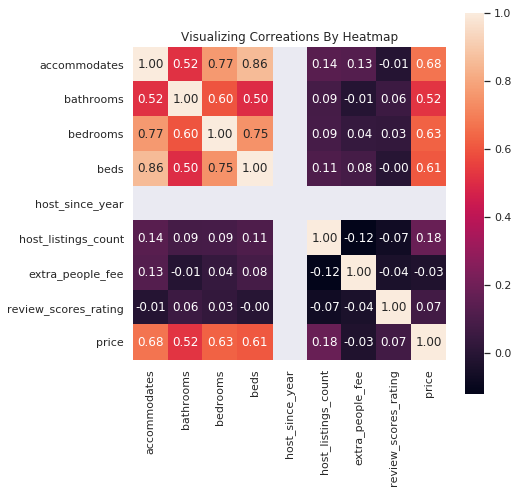

In [53]:
#Now get the coulumn that are used for correlation
Correlation_columns = ['accommodates','bathrooms','bedrooms','beds','host_since_year',
        'host_listings_count', 'extra_people_fee',
        'review_scores_rating', 'price']

#correlation between columns 
coffecient_corr = np.corrcoef(Clean_DataFrame[Correlation_columns].values.T)
#Heatmap
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
heatmap_fig=sns.heatmap(coffecient_corr, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = Correlation_columns, xticklabels = Correlation_columns).set_title('Visualizing Correations By Heatmap')

fig = heatmap_fig.get_figure()
fig.savefig('correlations.png')

Here, we found that price is highly correlated with bathrooms, bedrooms, accomodates and beds. So there features affect the price 
as the price is higher the pace is good and luxirious.

## Question 3: What are the changes in price according to seasons? 

Answer: For this I get two years data that of 2016 gives the cear view. That suumer has reativey ow prices than winter season. 

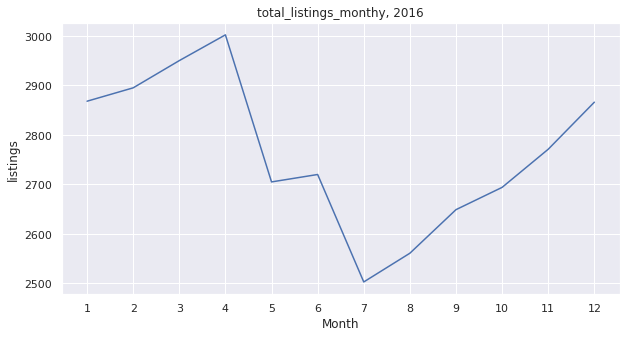

In [65]:
#listings for each month in 2016
total_listings_monthy = pd.Series([12])
for i in range(1, 13):
    total_listings_monthy[i] = len(Clean_DataFrame[(Clean_DataFrame['month'] == i) & (Clean_DataFrame['year'] == 2016)]['listing_id'].unique())
    
total_listings_monthy = total_listings_monthy.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(total_listings_monthy)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('listings')
plt.xlabel('Month')
plt.title('total_listings_monthy, 2016')

plt.savefig('number of available listings.png')

plt.show()

It is clearly seen that prices are also affected by month as in summer prices might lower than in winter.

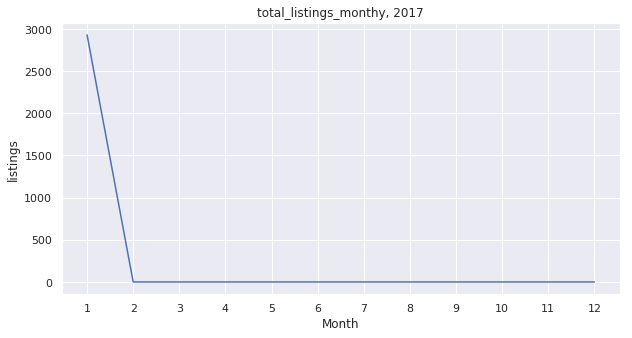

In [66]:
#listings for each month in 2017
total_listings_monthy = pd.Series([12])
for i in range(1, 13):
    total_listings_monthy[i] = len(Clean_DataFrame[(Clean_DataFrame['month'] == i) & (Clean_DataFrame['year'] == 2017)]['listing_id'].unique())
    
total_listings_monthy = total_listings_monthy.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(total_listings_monthy)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('listings')
plt.xlabel('Month')
plt.title('total_listings_monthy, 2017')

plt.savefig('number of available listings.png')

plt.show()

In [ ]:
2017, graph didn't give clear view as of 2016.